<font size = 5> <b> Задание. Вариант 16 </font></b>
1. Анализ популярности
форматов: сравнить
количество датасетов с
файлами .csv и .json по
теме "streaming".
2. Анализ языков в
организации: выбрать
крупную IT-компанию
(например, Google) и
проанализировать, какие
языки программирования
наиболее популярны в ее
публичных репозиториях.
3. Анализ
профессиональных
ролей: для 100 вакансий
"BI Analyst"
проанализировать, какие
другие названия
должностей встречаются
в тексте вакансии.

In [1]:
!pip install -q kaggle requests pandas matplotlib seaborn

# Задание 1.
Анализ популярности форматов: сравнить количество датасетов с файлами .csv и .json по теме "streaming"


https://technowhisp.com/kaggle-api-python-documentation/

In [ ]:
from google.colab import files

# Пожалуйста, загрузите файл kaggle.json
files.upload()

In [4]:
# Создаем директорию и копируем туда файл с токеном
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

###  Сбор данных

In [5]:
import kaggle
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Сначала собрала датасеты, содержащие в названии / описании 'streaming'. Цель - проверить на наличие таких датасетов, возможность скрейпить с нескольких страниц сайта, какие параметры датасетов можно при этом получить

In [6]:
# Ищем файлы по теме "Streaming"
num_pages = 10

# Список для хранения результатов
all_datasets = []

# Цикл по страницам
for page_number in range(1, num_pages + 1):
    # Запрашиваем одну страницу
    current_page_datasets = kaggle.api.dataset_list(search='streaming', page=page_number) #, sort_by='hottest')
    all_datasets.extend(current_page_datasets)

# Преобразуем в DataFrame для удобства
df_streaming = pd.DataFrame([vars(c) for c in all_datasets])


# Выбираем 5 датасетов
top5_downloaded = df_streaming.sort_values(by='_download_count', ascending=False).head(5)

print("топ-5 датасетов по количеству загрузок, содержащих в теме 'streaming':")

# ИСПРАВЛЕНИЕ: Используем правильные имена столбцов с подчеркиванием в начале:
display(top5_downloaded [['_title', '_subtitle', '_download_count', '_view_count',	'_vote_count']])


топ-5 датасетов по количеству загрузок, содержащих в теме 'streaming':


,_title,_subtitle,_download_count,_view_count,_vote_count
31,Credit Card Fraud Detection,Anonymized credit card transactions labeled as...,1001705,12102456,12516
17,Netflix Movies and TV Shows,Listings of movies and tv shows on Netflix - R...,658534,3623408,9367
18,Telco Customer Churn,Focused customer retention programs,429529,2537482,3226
61,US Accidents (2016 - 2023),A Countrywide Traffic Accident Dataset (2016 -...,161848,1041356,2528
24,Most Streamed Spotify Songs 2023,Hottest Spotify Hits 🎵,121339,567815,1943


Посмотрим, как выглядит информация о файлах

In [7]:

all_files = []
num_pages = 1
for pages in range(1,num_pages+1):
    for dataset in kaggle.api.dataset_list(search='streaming', page=pages):
        files = kaggle.api.dataset_list_files(dataset.ref).files
        all_files.extend(files)

all_files[:7]

[{"ref": "", "datasetRef": "", "ownerRef": "", "name": "spotify_history.csv", "creationDate": "2025-01-25T05:14:51.526Z", "description": "", "fileType": "", "url": "", "totalBytes": 21329900, "columns": []},
 {"ref": "", "datasetRef": "", "ownerRef": "", "name": "streaming_viewership_data.csv", "creationDate": "2023-10-20T22:12:07.890Z", "description": "", "fileType": "", "url": "", "totalBytes": 1031049, "columns": []},
 {"ref": "", "datasetRef": "", "ownerRef": "", "name": "spotify_data_dictionary.csv", "creationDate": "2025-01-29T05:30:41.051Z", "description": "", "fileType": "", "url": "", "totalBytes": 655, "columns": []},
 {"ref": "", "datasetRef": "", "ownerRef": "", "name": "spotify_history.csv", "creationDate": "2025-01-29T05:30:41.919Z", "description": "", "fileType": "", "url": "", "totalBytes": 21329900, "columns": []},
 {"ref": "", "datasetRef": "", "ownerRef": "", "name": "Cleaned_Spotify_2024_Global_Streaming_Data.csv", "creationDate": "2025-04-30T05:16:59.021Z", "descri

Далее посчитала количество файлов формата .csv и .json для датасетов на 10 страницах сайта

In [8]:
num_pages = 10

# Список для хранения всех файлов и информации о датасетах
all_files_and_datasets = []
all_datasets2 = []

# Цикл по страницам и датасетам для получения списка файлов
for page_number in range(1, num_pages + 1):
    current_page_datasets = kaggle.api.dataset_list(search='streaming', page=page_number)
    all_datasets2.extend(current_page_datasets)
    for dataset in current_page_datasets:
        try:
            files = kaggle.api.dataset_list_files(dataset.ref).files
            for file in files:
                file_info = vars(file)
                file_info['dataset_ref'] = dataset.ref # Добавляем ссылку на датасет к информации о файле
                all_files_and_datasets.append(file_info)
        except Exception as e:
            print(f"Error listing files for dataset {dataset.ref}: {e}")
         # Вежливая задержка между запросами
        time.sleep(1)

# Преобразуем в DataFrame для удобства
df_streaming_files = pd.DataFrame(all_files_and_datasets) # датасет с файлами и реф.датасета kaggle
df_streaming2 = pd.DataFrame([vars(c) for c in all_datasets2]) # датасет с основными с данными по датасету kaggle

In [9]:
# Считаем количество файлов с расширением .csv и .json
csv_count = sum(1 for file_info in all_files_and_datasets if file_info['_name'].lower().endswith('.csv')) # исправлено название столбца на "_name"
json_count = sum(1 for file_info in all_files_and_datasets if file_info['_name'].lower().endswith('.json')) # исправлено название столбца на "_name"

print(f"Количество .csv файлов: {csv_count}")
print(f"Количество .json файлов: {json_count}")

Количество .csv файлов: 411
Количество .json файлов: 19



>>>**Вывод:** на 10 страницах нашлось 412 csv-файлов и только 19 json-файлов



### Анализ и визуалиация

In [43]:
# получим более полную информацию

df_streaming_w_files = pd.merge(df_streaming_files[['_name', 'dataset_ref']].rename({"_name": "file_name"}, axis = 1), df_streaming2, how = "left", left_on = "dataset_ref", right_on = "_ref")
df_streaming_w_files_cl = df_streaming_w_files[['_id','_title', '_subtitle', '_download_count', '_view_count',	'_vote_count', "file_name"]]
df_streaming_w_files_cl.sort_values(by = '_download_count', ascending = False).head()

,_id,_title,_subtitle,_download_count,_view_count,_vote_count,file_name
97,310,Credit Card Fraud Detection,Anonymized credit card transactions labeled as...,1001705,12102456,12516,creditcard.csv
81,434238,Netflix Movies and TV Shows,Listings of movies and tv shows on Netflix - R...,658534,3623409,9367,netflix_titles.csv
82,13996,Telco Customer Churn,Focused customer retention programs,429529,2537482,3226,WA_Fn-UseC_-Telco-Customer-Churn.csv
159,199387,US Accidents (2016 - 2023),A Countrywide Traffic Accident Dataset (2016 -...,161848,1041356,2528,US_Accidents_March23.csv
88,3668746,Most Streamed Spotify Songs 2023,Hottest Spotify Hits 🎵,121339,567815,1943,spotify-2023.csv


In [44]:
# добавим признак с расширением файла
df_streaming_w_files_cl.loc[:,'file_type'] = df_streaming_w_files_cl.loc[:,'file_name'].str.split('.').str[1]
# оставим в данных только 2 вида файлов csv & json
df_streaming_w_files_cl_csv_json = df_streaming_w_files_cl[df_streaming_w_files_cl['file_type'].isin(['csv', 'json'])]

two_types = 0

for i in df_streaming_w_files_cl_csv_json['_id']:
    if df_streaming_w_files_cl_csv_json.loc[df_streaming_w_files_cl_csv_json['_id']==i]['file_type'].nunique() == 2:
        two_types +=1
    else:
        continue
print("Количество датасетов, в которых содержатся файлы как csv, так и json: ", two_types)

Количество датасетов, в которых содержатся файлы как csv, так и json:  0


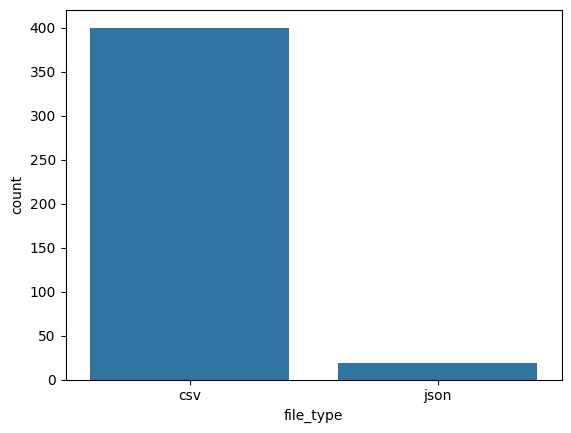

In [45]:
pict_1 = sns.barplot(data = df_streaming_w_files_cl_csv_json['file_type'].value_counts()).get_figure()

In [46]:
pict_1.savefig('pict_1.png')

In [48]:
# посчитаем сколько файлов в одном датасете
df_streaming_w_files_cl_csv_json.loc[:,'files_num'] = df_streaming_w_files_cl_csv_json.groupby(['_id'])['file_name'].transform("nunique")
df_streaming_w_files_cl_csv_json = df_streaming_w_files_cl_csv_json.drop({'_id', 'file_name'}, axis= 1).drop_duplicates()

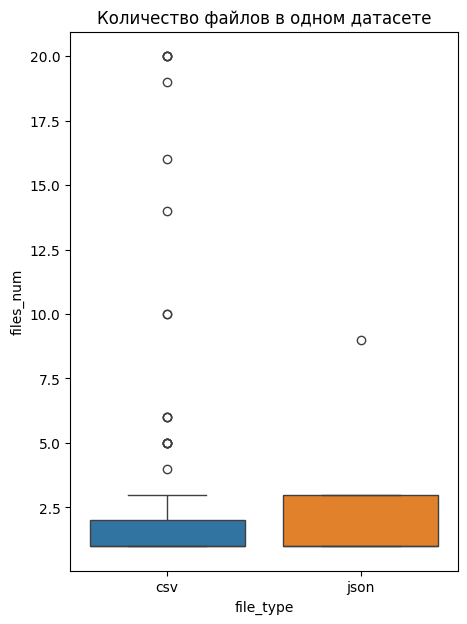

In [55]:
plt.figure (figsize = (5,7))
pict_2 = sns.boxplot(data = df_streaming_w_files_cl_csv_json, x = 'file_type', y = 'files_num', hue = 'file_type').get_figure()
plt.title("Количество файлов в одном датасете")
plt.show()
pict_2.savefig('pict_2.png')

In [40]:
top5_csv = df_streaming_w_files_cl_csv_json[df_streaming_w_files_cl_csv_json['file_type']=='csv']['_download_count'].nlargest(5).reset_index().drop('index', axis =1)
top5_json = df_streaming_w_files_cl_csv_json[df_streaming_w_files_cl_csv_json['file_type']=='json']['_download_count'].nlargest(5).reset_index().drop('index', axis =1)

top5 = pd.merge(top5_csv, top5_json, how = "left", left_index = True, right_index = True, suffixes=['_csv', '_json'])
top5

,_download_count_csv,_download_count_json
0,1001705,4032
1,658534,1492
2,429529,1314
3,161848,1301
4,121339,1124


### Вывод:
- Была собрана информация с 10 страниц сайта, по датасетам, относящимся к тематике 'streaming'. На собранных данных нашлось 412 csv-файлов, 19 - json-файлов
- среди собранных данных не было датасетов, содержащих как csv, так и json файлы
- в большинстве случаев в одном датасете содержится по одному файлу. При этом (по собранным данным), разброс количества csv-файлов - от 1 до 20, json - от 1 до 9
- количество загрузок csv-файлов значительно превышает количество загрузок json

# Задание 2.
Анализ языков в организации: выбрать крупную IT-компанию (например, Google) и проанализировать, какие языки программирования наиболее популярны в ее публичных репозиториях.


#### 2.1. Аутентификация в GitHub API

In [56]:
# получить секрет
from google.colab import userdata
gh_auth = userdata.get('gh_auth')

In [57]:
import requests
from datetime import datetime, timedelta

# ВАЖНО: Замените 'ВАШ_ТОКЕН' на свой персональный токен GitHub
ACCESS_TOKEN = gh_auth
GITHUB_API_URL = "https://api.github.com"

headers = {
    "Authorization": f"token {ACCESS_TOKEN}",
    "Accept": "application/vnd.github.v3+json"
}

#### 2.2. Поиск репозиториев Google

In [58]:
# Search for repositories belonging to the 'Google' organization
languages_list = []
pages = 10
per_page = 100 # Maximum allowed per page

# Iterate through pages
for page in range(1, pages + 1):
    params = {"sort": "stars", "order": "desc", "per_page": per_page, "page": page}
    response = requests.get(f"{GITHUB_API_URL}/orgs/google/repos", params=params, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        repos = response.json()
        # Extract languages from each repository
        for repo in repos:
            language = repo.get('language')
            if language: # Only add if language is not None
                languages_list.append(language)
    else:
        print(f"Error fetching data from page {page}: {response.status_code}")
        break # Stop if there's an error

# Print the collected languages (optional, for verification)
# print(languages_list)

#### 2.3. Подсчет использованных языков программирования

In [59]:
from collections import Counter

# Count the occurrences of each language
language_counts = Counter(languages_list)

# Print the language popularity
print("Language popularity in Google's public repositories:")
for language, count in language_counts.most_common():
    print(f"{language}: {count}")

Language popularity in Google's public repositories:
Python: 245
C++: 118
Go: 78
Rust: 65
TypeScript: 57
Jupyter Notebook: 51
JavaScript: 50
Java: 46
C: 29
Kotlin: 27
Shell: 25
HTML: 20
C#: 17
Haskell: 14
Dart: 13
Verilog: 13
Swift: 7
Objective-C: 5
HCL: 5
Apex: 4
Vue: 2
PowerShell: 2
Smarty: 2
PHP: 2
Makefile: 2
R: 2
Dockerfile: 2
MATLAB: 2
Lean: 2
M4: 1
Svelte: 1
ABAP: 1
Mathematica: 1
CSS: 1
YARA: 1
ShaderLab: 1
LLVM: 1
Tcl: 1
Lua: 1
Jsonnet: 1
Ruby: 1
GLSL: 1
D: 1


#### 2.4. Визуализация

In [60]:
df_google_languages = pd.DataFrame(language_counts.most_common(), columns=['language', 'count'])
df_google_languages.head()

,language,count
0,Python,245
1,C++,118
2,Go,78
3,Rust,65
4,TypeScript,57


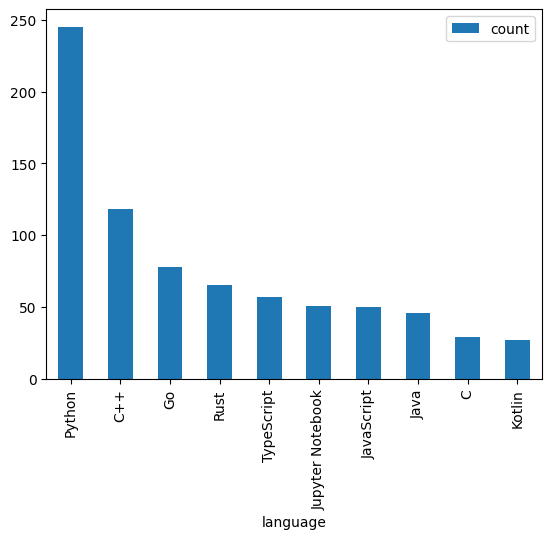

In [61]:
pict_3 = df_google_languages.set_index('language').nlargest(10, ['count']).plot(kind = "bar" ).get_figure()
pict_3.savefig('pict_3.png')

In [64]:
print(f"Доля Python: {df_google_languages[df_google_languages['language']=='Python']['count'].sum()/df_google_languages['count'].sum()*100:.2f}%")

Доля Python: 26.60%


### Вывод:
Используя GitHub API, определили:

*   в репозиториях Google используется 43 языка
*   Самый популярный из них - Python (26% от общего количества)
*   В топ-5 самых популярных языков входят: 'Python', 'C++', 'Go', 'Rust', 'TypeScript'


# Задание 3.
Анализ профессиональных ролей: для 100 вакансий "BI Analyst" проанализировать, какие другие названия должностей встречаются в тексте вакансии.

#### 3.1. Сбор данных и анализ

In [ ]:
import time
from collections import Counter

HH_API_URL = "https://api.hh.ru/vacancies"
all_vacancies = []
pages_to_load = 5 # 100 вакансий (по 20 на странице)

params = {
    'text': 'BI Analyst',
    'area': 1, # Москва
    'per_page': 20
}

for page in range(pages_to_load):
    params['page'] = page
    response = requests.get(HH_API_URL, params=params)
    if response.status_code == 200:
        vacancies_data = response.json()
        all_vacancies.extend(vacancies_data['items'])
        print(f"Загружена страница {page + 1}/{pages_to_load}")
    else:
        print(f"Ошибка при загрузке страницы {page + 1}: {response.status_code}")
        break
    time.sleep(0.2) # Соблюдаем вежливость к API

print(f"\nВсего найдено вакансий: {len(all_vacancies)}")

Загружена страница 1/5
Загружена страница 2/5
Загружена страница 3/5
Загружена страница 4/5
Загружена страница 5/5

Всего найдено вакансий: 100


In [ ]:
all_vacancies[0]

{'id': '124700500',
 'premium': False,
 'name': 'Финансовый директор (CFO)',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 900000, 'to': None, 'currency': 'RUR', 'gross': False},
 'salary_range': {'from': 900000,
  'to': None,
  'currency': 'RUR',
  'gross': False,
  'mode': {'id': 'MONTH', 'name': 'За\xa0месяц'},
  'frequency': None},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2025-09-29T09:42:54+0300',
 'created_at': '2025-09-29T09:42:54+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=124700500',
 'branding': {'type': 'CONSTRUCTOR', 'tariff': 'BASIC'},
 'show_logo_in_search': True,
 'show_contacts': False,
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/124700500?host=hh.ru',
 'alternate_url': 'http

In [ ]:
name_list = []
for i in range(len(all_vacancies)):
    name_list.append(all_vacancies[i]['name'])


In [ ]:
name_rating = Counter(name_list)
for name, count in name_rating.most_common():
    print(f'{name}, {count}')

Аналитик данных, 8
Аналитик, 5
Бизнес-аналитик, 5
Продуктовый аналитик, 3
Младший аналитик данных, 2
Финансовый аналитик, 2
Финансовый директор (CFO), 1
Финансовый менеджер - аналитик, 1
HR-аналитик, 1
Менеджер по маркетингу в команду инклюзии, 1
Менеджер по работе с маркетплейсом OZON, 1
Финансовый руководитель, 1
Директор по стратегическому развитию и маркетингу, 1
Руководитель отдела бизнес-аналитики/BI Head, 1
Менеджер проектов, 1
Заместитель начальника инспекции Департамента аудита образования, науки и инноваций, 1
Marketing Analyst, 1
Руководитель HR проектов, 1
Продакт менеджер / Product Manager., 1
Младший менеджер продукта, 1
Стажер в команду аналитики сервиса путешествий, 1
Бизнес-аналитик отдела закупок / Procurement Business Analyst, 1
Руководитель направления компенсаций и льгот (C&B Manager / Head of C&B), 1
Junior Data Scientist, 1
Middle Product Manager, 1
Аналитик данных процесса обязательной маркировки «Честный Знак» / Fair Sign Data Analyst, 1
Консультант SAP, 1
Data

In [ ]:
all_skills = []

for vacancy in all_vacancies:
    # Получаем детальную информацию о вакансии, т.к. ключевые навыки могут быть не в кратком описании
    vacancy_url = vacancy['url']
    vacancy_details_response = requests.get(vacancy_url)
    if vacancy_details_response.status_code == 200:
      vacancy_details = vacancy_details_response.json()
      if 'key_skills' in vacancy_details:
          for skill in vacancy_details['key_skills']:
              all_skills.append(skill['name'].lower()) # Приводим к нижнему регистру для стандартизации
    time.sleep(0.2)

# Считаем частоту встречаемости каждого навыка
skill_counts = Counter(all_skills)

# Выводим топ-10 самых популярных навыков
top_10_skills = skill_counts.most_common(10)
print("Топ-10 ключевых навыков для BI Analyst:")
for skill, count in top_10_skills:
    print(f"- {skill}: {count} раз")

Топ-10 ключевых навыков для Data Scientist:
- sql: 24 раз
- power bi: 23 раз
- аналитическое мышление: 21 раз
- python: 13 раз
- анализ данных: 10 раз
- бизнес-анализ: 9 раз
- tableau: 8 раз
- ms excel: 7 раз
- работа с большим объемом информации: 6 раз
- управленческая отчетность: 5 раз


### Вывод:
- в тексте вакансий встречается много других должностей, содержащих слова "аналитик" и/или "BI", также такие должности как: "Директор по продажам/Коммерческий директор (FMCG)", "Директор по маркетингу / CMO", "Менеджер по работе с маркетплейсом OZON", "Финансовый руководитель".
- Эти должности с вакансией "BI-аналитик" объединяют ключевые навыки, в топе которых:
 1. sql
 2. power bi
 3. аналитическое мышление
 4. python
 5. анализ данных


